In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [44]:
from sklearn.datasets import load_diabetes
data = load_diabetes()

In [45]:
x = data.data
y = data.target

In [46]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=45) 

In [47]:
from sklearn.linear_model import LinearRegression
l = LinearRegression()

In [48]:
l.fit(x_train, y_train)

LinearRegression()

In [49]:
y_pred = l.predict(x_test)

In [50]:
from sklearn.metrics import r2_score, mean_squared_error
print('R2 Score:', r2_score(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

R2 Score: 0.5188113124539249
RMSE: 48.72713760953253


In [51]:
from sklearn.linear_model import Ridge
r = Ridge(alpha=0.0001)

In [52]:
r.fit(x_train, y_train)
y_pred = r.predict(x_test)

In [53]:
print('Ridge R2 Score:', r2_score(y_test, r.predict(x_test)))


Ridge R2 Score: 0.5189732635884952


In [54]:
print('Ridge RMSE:', np.sqrt(mean_squared_error(y_test, r.predict(x_test))))

Ridge RMSE: 48.71893700181955


In [55]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np

In [56]:
x,y = make_regression(n_samples=100, n_features=1, noise=20, random_state=13, n_informative=1, n_targets=1)

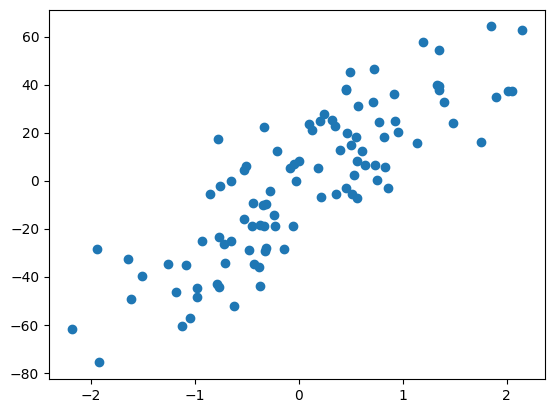

In [57]:
plt.scatter(x, y)

In [58]:
from sklearn.linear_model import LinearRegression

In [59]:
lr = LinearRegression()
lr.fit(x, y)
print(lr.coef_, lr.intercept_)

[27.82809103] -2.29474455867698


In [60]:
from sklearn.linear_model import Ridge

In [61]:
rr = Ridge(alpha=10)
rr.fit(x, y)
print(rr.coef_, rr.intercept_)

[24.9546267] -2.126913003523573


In [62]:
rr1 = Ridge(alpha=100)
rr1.fit(x, y)
print(rr.coef_, rr.intercept_)

[24.9546267] -2.126913003523573


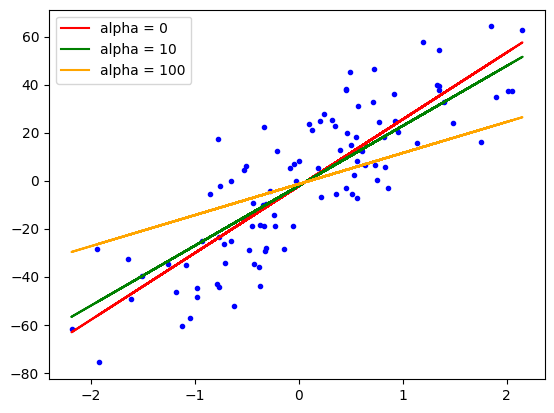

In [63]:
plt.plot(x,y,'b.')
plt.plot(x, lr.predict(x), color = 'red', label = 'alpha = 0')
plt.plot(x, rr.predict(x), color = 'green', label = 'alpha = 10')
plt.plot(x, rr1.predict(x), color = 'orange', label = 'alpha = 100')
plt.legend()


In [64]:
class myRidge:
    def __init__(self,alpha = 0.1):
        self.alpha = alpha
        self.m = None
        self.b = None

    def fit(self, x_train, y_train):
        num  = 0
        den = 0
        for i in range(len(x_train)):
            num += (x_train[i] - np.mean(x_train)) * (y_train[i] - np.mean(y_train))
            den += (x_train[i] - np.mean(x_train))**2 
        self.m = num/(den + self.alpha)
        self.b = np.mean(y_train) - self.m * np.mean(x_train)
        print(self.m, self.b)

    def predict(self, x_test):
        y_pred = []
        for i in x_test:
            y = self.m * i + self.b
            y_pred.append(y)
        return np.array(y_pred)

In [65]:
reg = myRidge(alpha=100)

In [66]:
reg.fit(x, y)

[12.93442104] [-1.42484415]


Lasso Regression

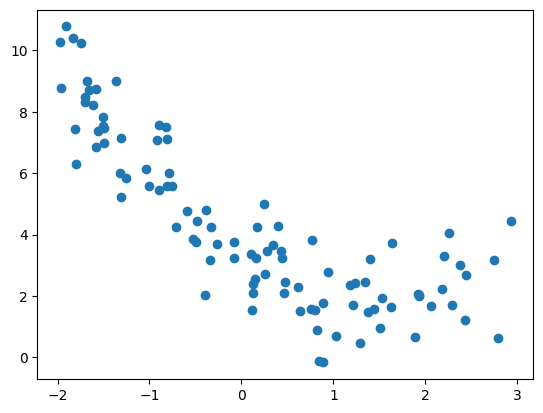

In [67]:
m = 100
x1 = 5 * np.random.rand(m, 1) - 2
x2 = 0.7 * x1**2 - 2 * x1 + 3 + np.random.randn(m, 1)

plt.scatter(x1, x2)
plt.show()

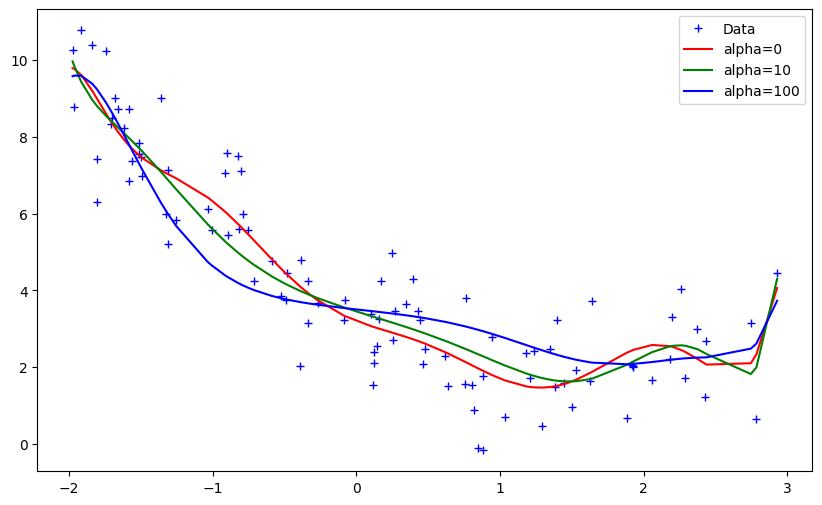

In [68]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge

def get_preds_lasso(x1, x2, alpha):
    model = Pipeline([
        ('poly', PolynomialFeatures(degree=10)),
        ('lasso', Ridge(alpha=alpha))
    ])
    model.fit(x1, x2)
    return model.predict(x1)

alphas = [0, 10, 100]
cs = ['r', 'g', 'b']

plt.figure(figsize=(10, 6))
plt.plot(x1, x2, 'b+', label='Data')

for alpha, c in zip(alphas, cs):
    preds = get_preds_lasso(x1, x2, alpha)
    plt.plot(np.sort(x1[:, 0]), preds[np.argsort(x1[:, 0])], c, label=f'alpha={alpha}')

plt.legend()
plt.show()

In [69]:
from sklearn.datasets import load_diabetes

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score

from sklearn.model_selection import train_test_split

In [70]:
data = load_diabetes()

df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [71]:
x_train, x_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=2)

In [73]:
coefs = []
r2_scores = []

for i in [0, 0.1, 1, 10, 100]:
    reg = Lasso(alpha=i)
    reg.fit(x_train, y_train)

    coefs.append(reg.coef_.tolist())
    y_pred = reg.predict(x_test)
    r2_scores.append(r2_score(y_test, y_pred))
    

c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.967e+05, tolerance: 2.124e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers i

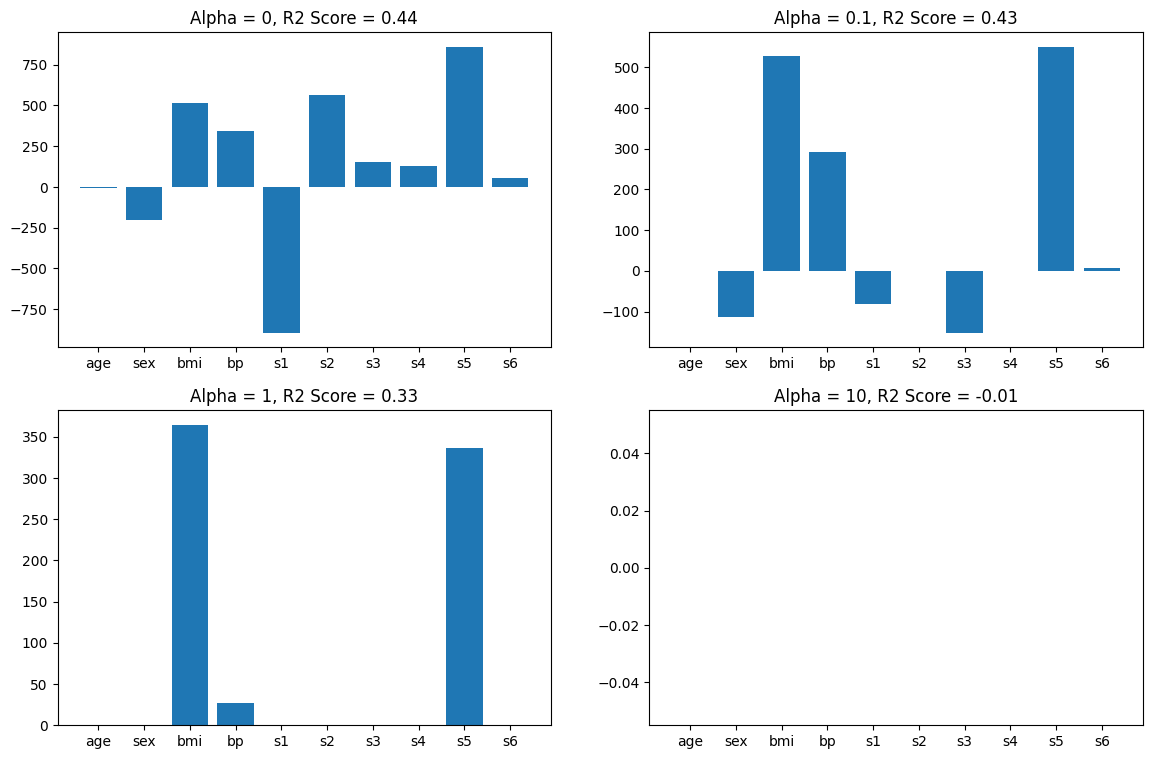

In [74]:
plt.figure(figsize=(14, 9))
plt.subplot(221)
plt.bar(data.feature_names, coefs[0])
plt.title('Alpha = 0, R2 Score = {}'.format(round(r2_scores[0], 2)))

plt.subplot(222)
plt.bar(data.feature_names, coefs[1])
plt.title('Alpha = 0.1, R2 Score = {}'.format(round(r2_scores[1], 2)))

plt.subplot(223)
plt.bar(data.feature_names, coefs[2])
plt.title('Alpha = 1, R2 Score = {}'.format(round(r2_scores[2], 2)))

plt.subplot(224)
plt.bar(data.feature_names, coefs[3])
plt.title('Alpha = 10, R2 Score = {}'.format(round(r2_scores[3], 2)))

plt.show()
